In [1]:
#importing library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#importing data 
re_data=pd.read_csv(r'C:/Users/hp/Desktop/kaam ka kaam/Zomato-scraper-main/restaurants_data.csv')
re_data.head()                    

,id,name,link,image
0,1,Empire Restaurant,https://www.zomato.com/bangalore/empire-restau...,NaN
1,2,Imperial Restaurant - Since 1954,https://www.zomato.com/bangalore/imperial-rest...,NaN
2,3,KFC,https://www.zomato.com/bangalore/kfc-brigade-r...,NaN
3,4,A2B - Adyar Ananda Bhavan,https://www.zomato.com/bangalore/a2b-adyar-ana...,https://b.zmtcdn.com/data/pictures/5/20279385/...
4,5,Maven Kitchen,https://www.zomato.com/bangalore/maven-kitchen...,https://b.zmtcdn.com/data/pictures/9/19339139/...


In [43]:
df_detail=pd.read_csv(r'C:/Users/hp/Desktop/kaam ka kaam/Zomato-scraper-main/restaurant_details_data.csv')
df_detail.head()

,id,restaurant known for,delivery_rating,delivery_review_number,location,timings,average_price,Dishes,cuisines
0,1,"Overall the Food was Good, Juice Prices, Good ...",4.2,19.7,"Shivajinagar, Bangalore",11am – 2:30am,950,"Chicken Kheema Dosa, Mutton Shaadi Ki Biryani,...","['North Indian', 'Biryani', 'Kebab', 'South In..."
1,2,"Cleanliness, Cutlery, Management, Table, Porti...",4.2,7.0,"Residency Road, Bangalore",10am – 1am,1000,"Brain Pepper Fry, Bheja Fry, Kababs, Chicken K...","['North Indian', 'Mughlai', 'Chinese', 'Biryan..."
2,3,"Cute Packaging, Weekend Brunch, Good Wifi, Foo...",3.8,1.0,"Brigade Road, Bangalore","12midnight – 1am, 11am – 12midnight",500,"Maggie, Hot Wings, Cheesecake, Fries, Chicken","['Fast Food', 'Burger', 'Biryani', 'Desserts',..."
3,4,NaN,4.3,2.0,"Shanti Nagar, Bangalore",7am – 7pm,600,NaN,"['South Indian', 'North Indian', 'Biryani', 'C..."
4,5,"Authentic, Hygienic, Perfect Presentation, Won...",4.5,2.0,"Ejipura, Bangalore",12noon – 10:45pm,500,"Manipuri Fish Curry, Smoked Pork, Momos, Chicken","['Chinese', 'North Eastern', 'Beverages']"


In [ ]:
#checking data 

In [4]:
df_detail['timings'].unique()

array(['11am – 2:30am', '10am – 1am',
       '12midnight – 1am, 11am – 12midnight', '7am – 7pm',
       '12noon – 10:45pm', '12midnight – 3am, 11am – 12midnight',
       '8am – 6am', '12midnight – 2am, 11am – 12midnight', '9am – 9pm',
       '12midnight – 1:30am, 11:30am – 12midnight',
       '11:30am – 3:45pm, 6:30pm – 10:45pm', nan, '11am – 11pm',
       '12noon – 10:30pm', '12midnight – 2am, 7am – 12midnight',
       '10am – 2:45am', '11:30am – 4pm, 6:30pm – 11pm', '9:30am – 10pm',
       '11:30am – 4pm, 6:30pm – 12midnight', '8am – 11:30pm',
       '11am – 12midnight', '12midnight – 1am, 9am – 12midnight',
       '11am – 11:30pm', '11:45am – 11pm', '11am – 3am',
       '11:30am – 11:30pm', '12noon – 4pm, 7pm – 11:30pm',
       '12noon – 4pm, 7pm – 10:30pm', '11am – 4:30pm, 6:30pm – 11:45pm',
       '8:30am – 11:30pm', '8am – 5pm', '7am – 10:30pm',
       '12:30pm – 11:30pm', '7:30am – 10pm', '7:30am – 11pm',
       '10am – 10pm', '12midnight – 2am, 11:30am – 12midnight',
       '9a

In [44]:
df_detail['timings']=df_detail['timings'].str.replace('midnight','AM')

In [6]:
df_detail['timings']=df_detail['timings'].str.replace('noon','PM')

In [7]:
df_detail['timings'].unique()

array(['11am – 2:30am', '10am – 1am', '12PM – 1am, 11am – 12PM',
       '7am – 7pm', '12PM – 10:45pm', '12PM – 3am, 11am – 12PM',
       '8am – 6am', '12PM – 2am, 11am – 12PM', '9am – 9pm',
       '12PM – 1:30am, 11:30am – 12PM',
       '11:30am – 3:45pm, 6:30pm – 10:45pm', nan, '11am – 11pm',
       '12PM – 10:30pm', '12PM – 2am, 7am – 12PM', '10am – 2:45am',
       '11:30am – 4pm, 6:30pm – 11pm', '9:30am – 10pm',
       '11:30am – 4pm, 6:30pm – 12PM', '8am – 11:30pm', '11am – 12PM',
       '12PM – 1am, 9am – 12PM', '11am – 11:30pm', '11:45am – 11pm',
       '11am – 3am', '11:30am – 11:30pm', '12PM – 4pm, 7pm – 11:30pm',
       '12PM – 4pm, 7pm – 10:30pm', '11am – 4:30pm, 6:30pm – 11:45pm',
       '8:30am – 11:30pm', '8am – 5pm', '7am – 10:30pm',
       '12:30pm – 11:30pm', '7:30am – 10pm', '7:30am – 11pm',
       '10am – 10pm', '12PM – 2am, 11:30am – 12PM', '9am – 4am',
       '11am – 4pm, 7pm – 12PM', '9:30am – 11pm', '7am – 10pm',
       '7am – 9:30pm', '8am – 10pm', '11:30am – 5pm

In [45]:
df_detail['average_price'].unique()

array([ 950, 1000,  500,  600,  450, 2000,  300,  350,  400,  900,  850,
        650,  550,  800,  700,   50,  750], dtype=int64)

In [11]:
re_data.dtypes

id        int64
name     object
link     object
image    object
dtype: object

In [12]:
df_detail.dtypes

id                          int64
restaurant known for       object
delivery_rating           float64
delivery_review_number    float64
location                   object
timings                    object
average_price               int32
Dishes                     object
cuisines                   object
dtype: object

In [13]:
# checking for null values 
re_data.isnull().sum()

id         0
name       0
link       0
image    183
dtype: int64

In [14]:
# checking for null values 
df_detail.isnull().sum()

id                          0
restaurant known for      209
delivery_rating             0
delivery_review_number      0
location                    0
timings                   121
average_price               0
Dishes                    366
cuisines                    0
dtype: int64

In [15]:
# Fill null values in the 'image' column with a placeholder string
re_data['image'].fillna('missing_image.jpg', inplace=True)

In [17]:
# fillin na to make sure data looks real 
df_detail['Dishes'].fillna('not available', inplace=True)

In [18]:
df_detail['timings'].fillna('not available', inplace=True)

In [19]:
df_detail['restaurant known for'].fillna('not available', inplace=True)

In [20]:
df_detail.isnull().sum()

id                        0
restaurant known for      0
delivery_rating           0
delivery_review_number    0
location                  0
timings                   0
average_price             0
Dishes                    0
cuisines                  0
dtype: int64

In [21]:
re_data.isnull().sum()

id       0
name     0
link     0
image    0
dtype: int64

In [22]:
#check dublicate values 
re_data.duplicated().sum()

0

In [23]:
df_detail.duplicated().sum()

0

In [46]:
# Merge the two tables based on the 'id' column
merged_data = pd.merge(re_data, df_detail, on='id', how='inner')

In [47]:
merged_data.head()

,id,name,link,image,restaurant known for,delivery_rating,delivery_review_number,location,timings,average_price,Dishes,cuisines
0,1,Empire Restaurant,https://www.zomato.com/bangalore/empire-restau...,NaN,"Overall the Food was Good, Juice Prices, Good ...",4.2,19.7,"Shivajinagar, Bangalore",11am – 2:30am,950,"Chicken Kheema Dosa, Mutton Shaadi Ki Biryani,...","['North Indian', 'Biryani', 'Kebab', 'South In..."
1,2,Imperial Restaurant - Since 1954,https://www.zomato.com/bangalore/imperial-rest...,NaN,"Cleanliness, Cutlery, Management, Table, Porti...",4.2,7.0,"Residency Road, Bangalore",10am – 1am,1000,"Brain Pepper Fry, Bheja Fry, Kababs, Chicken K...","['North Indian', 'Mughlai', 'Chinese', 'Biryan..."
2,3,KFC,https://www.zomato.com/bangalore/kfc-brigade-r...,NaN,"Cute Packaging, Weekend Brunch, Good Wifi, Foo...",3.8,1.0,"Brigade Road, Bangalore","12AM – 1am, 11am – 12AM",500,"Maggie, Hot Wings, Cheesecake, Fries, Chicken","['Fast Food', 'Burger', 'Biryani', 'Desserts',..."
3,4,A2B - Adyar Ananda Bhavan,https://www.zomato.com/bangalore/a2b-adyar-ana...,https://b.zmtcdn.com/data/pictures/5/20279385/...,NaN,4.3,2.0,"Shanti Nagar, Bangalore",7am – 7pm,600,NaN,"['South Indian', 'North Indian', 'Biryani', 'C..."
4,5,Maven Kitchen,https://www.zomato.com/bangalore/maven-kitchen...,https://b.zmtcdn.com/data/pictures/9/19339139/...,"Authentic, Hygienic, Perfect Presentation, Won...",4.5,2.0,"Ejipura, Bangalore",12noon – 10:45pm,500,"Manipuri Fish Curry, Smoked Pork, Momos, Chicken","['Chinese', 'North Eastern', 'Beverages']"


In [26]:
df_detail.columns

Index(['id', 'restaurant known for', 'delivery_rating',
       'delivery_review_number', 'location', 'timings', 'average_price',
       'Dishes', 'cuisines'],
      dtype='object')

In [ ]:
# EDA

In [27]:
#-->1 Area-wise distribution of restaurants
area_distribution = merged_data.groupby('location')['id'].count()
print(area_distribution)

location
1 Sobha, Bangalore                                   3
BTM, Bangalore                                      56
Banashankari, Bangalore                              9
Basavanagudi, Bangalore                             12
Basaveshwara Nagar, Bangalore                       13
Brigade Road, Bangalore                             20
Building 105, Koramangala 5th Block, Bangalore       1
Church Street, Bangalore                            14
City Market, Bangalore                               4
Commercial Street, Bangalore                         9
Cunningham Road, Bangalore                           9
Domlur, Bangalore                                    5
Ejipura, Bangalore                                   2
Forum Rex Walk, Bangalore                            2
Frazer Town, Bangalore                              24
Garuda Mall, Magrath Road, Bangalore                 6
HBR Layout, Bangalore                                2
Hosur Road, Bangalore                                8
I

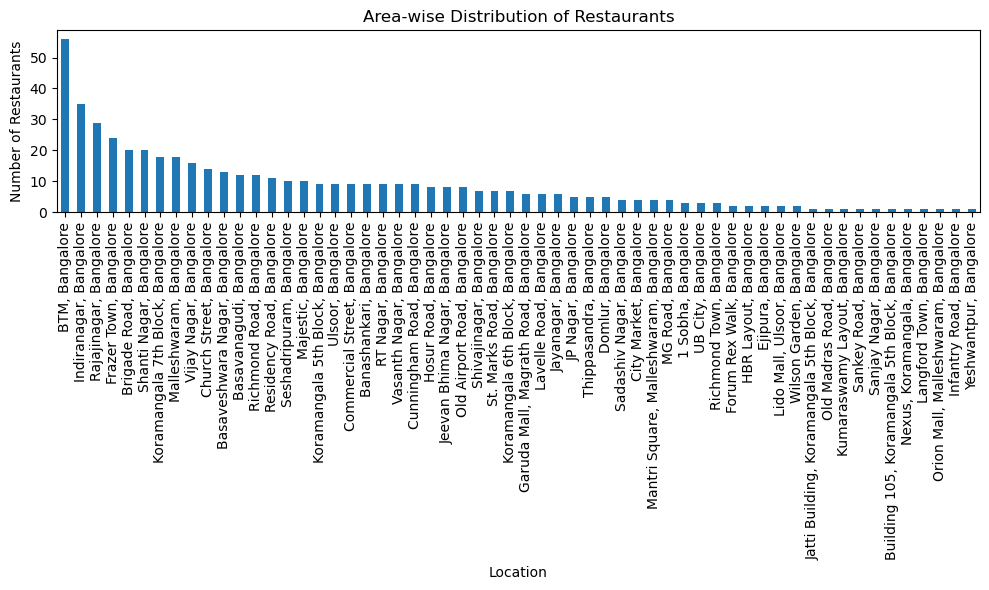

In [28]:
# Calculate area-wise distribution of restaurants
area_distribution = merged_data['location'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
area_distribution.plot(kind='bar')
plt.title('Area-wise Distribution of Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [48]:
#-->2 Cheapest and most expensive restaurant for each type of cuisine
cheapest_per_cuisine = df_detail.loc[df_detail.groupby('cuisines')['average_price'].idxmin()]
most_expensive_per_cuisine = df_detail.loc[df_detail.groupby('cuisines')['average_price'].idxmax()]

In [49]:
print(cheapest_per_cuisine)


      id                               restaurant known for  delivery_rating  \
17    18  Everything was very Good, Amazing Food at Amaz...              4.0   
207  214  Elaborate Menu, Good Quality, Ambience, Food, ...              4.1   
310  318  Staff Service, Seating Options, Good Portion S...              4.2   
10    11  Satisfying Meals, Serving Style, Ample Seating...              4.3   
27    28  Good with Reasonable Price, Average Sized Port...              4.2   
..   ...                                                ...              ...   
179  186  Soft Music, Fast Delivery, Student Crowd, Perf...              4.1   
130  135  Great Services, More Variety, Cafe, Young Crow...              4.1   
446  455                                                NaN              3.6   
342  351  Totally Worth it, Pretty Decor, Pocket Friendl...              4.3   
68    69                                                NaN              4.4   

     delivery_review_number            

In [51]:
print(most_expensive_per_cuisine)

      id                               restaurant known for  delivery_rating  \
17    18  Everything was very Good, Amazing Food at Amaz...              4.0   
207  214  Elaborate Menu, Good Quality, Ambience, Food, ...              4.1   
310  318  Staff Service, Seating Options, Good Portion S...              4.2   
10    11  Satisfying Meals, Serving Style, Ample Seating...              4.3   
27    28  Good with Reasonable Price, Average Sized Port...              4.2   
..   ...                                                ...              ...   
179  186  Soft Music, Fast Delivery, Student Crowd, Perf...              4.1   
130  135  Great Services, More Variety, Cafe, Young Crow...              4.1   
446  455                                                NaN              3.6   
342  351  Totally Worth it, Pretty Decor, Pocket Friendl...              4.3   
68    69                                                NaN              4.4   

     delivery_review_number            

In [50]:
#-->3 Location with maximum number of restaurants where delivery_review_number is greater than 1000
max_review_count_location = df_detail[df_detail['delivery_review_number'] > 1.0]['location'].value_counts().idxmax()
print(max_review_count_location)

BTM, Bangalore


In [33]:
# 4 popular cuisine
popular_cuisine = df_detail['cuisines'].value_counts().idxmax()

In [34]:
print(popular_cuisine)

['Biryani', 'South Indian']


In [35]:
#-->5 Which location maximum number of the less-rated restaurant?
threshold = 4.0

# Filter the DataFrame for less-rated restaurants
less_rated_restaurants = df_detail[df_detail['delivery_rating'] < threshold]

# Count occurrences of each location
location_counts = less_rated_restaurants['location'].value_counts()

# Find the location with the maximum count
max_location = location_counts.idxmax()

print("Location with maximum number of less-rated restaurants:", max_location)

Location with maximum number of less-rated restaurants: BTM, Bangalore


In [52]:
#-->6 Area wise cheap and expensive restaurant and their average price
cheap_restaurant_per_location = merged_data.loc[merged_data.groupby('location')['average_price'].idxmin(), ['location', 'name', 'average_price']]
expensive_restaurant_per_location = merged_data.loc[merged_data.groupby('location')['average_price'].idxmax(), ['location', 'name', 'average_price']]


In [53]:
print(cheap_restaurant_per_location)

                                             location  \
12                                 1 Sobha, Bangalore   
307                                    BTM, Bangalore   
231                           Banashankari, Bangalore   
200                           Basavanagudi, Bangalore   
72                      Basaveshwara Nagar, Bangalore   
189                           Brigade Road, Bangalore   
342    Building 105, Koramangala 5th Block, Bangalore   
135                          Church Street, Bangalore   
413                            City Market, Bangalore   
186                      Commercial Street, Bangalore   
179                        Cunningham Road, Bangalore   
410                                 Domlur, Bangalore   
13                                 Ejipura, Bangalore   
338                         Forum Rex Walk, Bangalore   
7                              Frazer Town, Bangalore   
64               Garuda Mall, Magrath Road, Bangalore   
275                            

In [54]:
print(expensive_restaurant_per_location)

                                             location  \
481                                1 Sobha, Bangalore   
180                                    BTM, Bangalore   
334                           Banashankari, Bangalore   
111                           Basavanagudi, Bangalore   
269                     Basaveshwara Nagar, Bangalore   
272                           Brigade Road, Bangalore   
342    Building 105, Koramangala 5th Block, Bangalore   
130                          Church Street, Bangalore   
141                            City Market, Bangalore   
153                      Commercial Street, Bangalore   
49                         Cunningham Road, Bangalore   
251                                 Domlur, Bangalore   
4                                  Ejipura, Bangalore   
428                         Forum Rex Walk, Bangalore   
157                            Frazer Town, Bangalore   
105              Garuda Mall, Magrath Road, Bangalore   
314                            

In [39]:
#-->7 Number of restaurants for each type of cuisine
restaurant_count_per_cuisine = df_detail['cuisines'].value_counts()


In [40]:
print(restaurant_count_per_cuisine)

cuisines
['Biryani', 'South Indian']                                                                   14
['Bakery', 'Desserts']                                                                        13
['North Indian']                                                                              12
['South Indian']                                                                              12
['Ice Cream', 'Desserts']                                                                      8
                                                                                              ..
['Burger', 'Sandwich', 'Fast Food', 'Wraps', 'Biryani', 'Beverages', 'Desserts']               1
['Biryani', 'Mughlai']                                                                         1
['North Indian', 'Odia']                                                                       1
['Bubble Tea', 'Burger', 'Beverages', 'Tea', 'Fast Food', 'Street Food', 'Momos', 'Shake']     1
['Beverages', 'Juices

In [55]:
merged_data.describe() 

,id,delivery_rating,delivery_review_number,average_price
count,505.000000,505.000000,505.000000,505.000000
mean,258.170297,4.051485,135.517426,906.237624
std,148.785622,0.277107,248.115688,611.436721
min,1.000000,2.900000,0.000000,50.000000
25%,129.000000,3.900000,2.000000,400.000000
50%,259.000000,4.100000,9.000000,850.000000
75%,387.000000,4.200000,116.000000,1000.000000
max,513.000000,4.600000,986.000000,2000.000000


In [ ]:
#Inferences:

#1.The average rating of all the restaurants is 4.05
#2.The average cost in any restaurant is 906.23
#3.The rating of restaurants ranges from a lowest of 2.9 to a highest of 4.6
#4.The approximate cost ranges from a lowest of 50 to a highest of 2000